# Correlation heatmap and Pairwise relationships

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# loading the dataset
df = pd.read_csv("sales_df.csv")

In [4]:
# Checking first five rows
df.head()

,Order_Line,Order_ID,Bar_code_value,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Product_ID,Sales,Quantity,...,Segment,Age,Country,City,State,Postal_Code,Region,Order_Year,Order_Month,Order_Month_Name
0,7952,OF-2023-164959,98365963,2025-01-01,2025-01-05,Standard Class,KN-16390,OFF-LA-10004272,8.67,3,...,Corporate,43,United States,Los Angeles,California,90004.0,West,2025,1,Jan
1,7953,OF-2023-156818,78358033,2025-01-01,2025-01-03,Second Class,JD-16015,TEC-AC-10002323,132.60,6,...,Consumer,23,United States,Chicago,Illinois,60610.0,Central,2025,1,Jan
2,7954,OF-2023-127656,29106221,2025-01-01,2025-01-07,Standard Class,NW-18400,OFF-AR-10001166,30.32,4,...,Consumer,29,United States,Tigard,Oregon,97224.0,West,2025,1,Jan
3,7955,OF-2023-162015,64360984,2025-01-01,2025-01-08,Standard Class,KB-16240,TEC-AC-10003832,1287.45,5,...,Corporate,42,United States,Los Angeles,California,90036.0,West,2025,1,Jan
4,7956,OF-2023-162015,13758768,2025-01-01,2025-01-08,Standard Class,KB-16240,OFF-AP-10003040,168.10,5,...,Corporate,42,United States,Los Angeles,California,90036.0,West,2025,1,Jan


In [5]:
#chceking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_Line        9999 non-null   int64  
 1   Order_ID          9999 non-null   object 
 2   Bar_code_value    9999 non-null   int64  
 3   Order_Date        9999 non-null   object 
 4   Ship_Date         9999 non-null   object 
 5   Ship_Mode         9999 non-null   object 
 6   Customer_ID       9999 non-null   object 
 7   Product_ID        9999 non-null   object 
 8   Sales             9999 non-null   float64
 9   Quantity          9999 non-null   int64  
 10  Discount          9999 non-null   float64
 11  Profit            9999 non-null   float64
 12  Customer_Name     9999 non-null   object 
 13  Segment           9999 non-null   object 
 14  Age               9999 non-null   int64  
 15  Country           9999 non-null   object 
 16  City              9999 non-null   object 


In [6]:
# checking summary statistics
df.describe()

,Order_Line,Bar_code_value,Sales,Quantity,Discount,Profit,Age,Postal_Code,Order_Year,Order_Month
count,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5000.000000,5.003961e+07,229.880712,3.789779,0.156325,28.677304,44.434743,55320.320732,2023.354635,5.993199
std,2886.607005,2.887062e+07,623.131990,2.225894,0.206608,234.216468,15.670604,31466.920809,1.212246,3.338920
min,1.000000,2.428400e+04,0.444000,1.000000,0.000000,-6599.978000,18.000000,1841.000000,2021.000000,1.000000
25%,2500.500000,2.496490e+07,17.280000,2.000000,0.000000,1.727100,31.000000,27405.000000,2022.000000,3.000000
50%,5000.000000,5.014836e+07,54.500000,3.000000,0.200000,8.662000,45.000000,55901.000000,2023.000000,5.000000
75%,7499.500000,7.508131e+07,209.955000,5.000000,0.200000,29.364000,59.000000,90004.000000,2024.000000,9.000000
max,9999.000000,9.999855e+07,22638.480000,14.000000,0.800000,8399.976000,70.000000,99207.000000,2025.000000,12.000000


### Compute Pearson Correlations
The Pearson correlation matrix measures the strength and direction of linear relationships between key numeric variables: Sales, Profit, Quantity, and Discount.

In [8]:
numeric_cols = ['Sales', 'Profit', 'Quantity', 'Discount'] 
corr = df[numeric_cols].corr(method='pearson')
corr

,Sales,Profit,Quantity,Discount
Sales,1.000000,0.479127,0.200697,-0.028457
Profit,0.479127,1.000000,0.066214,-0.219443
Quantity,0.200697,0.066214,1.000000,0.008979
Discount,-0.028457,-0.219443,0.008979,1.000000


### Heatmap of Correlations

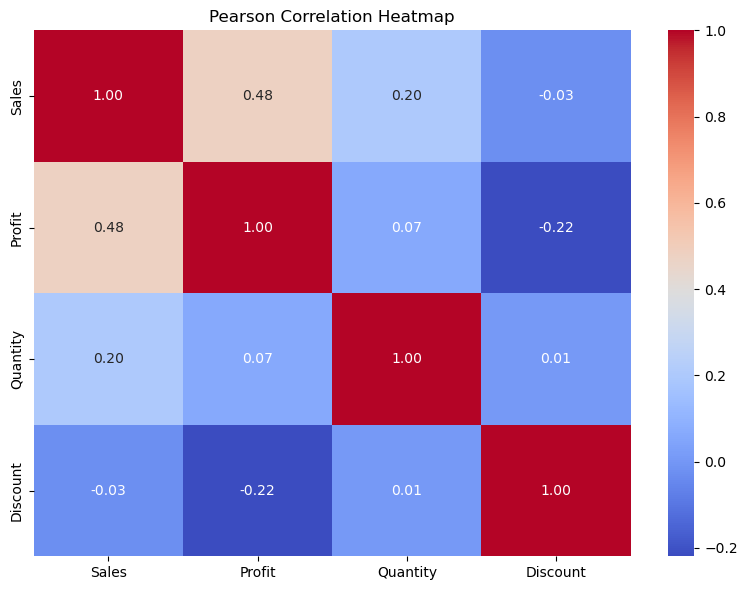

In [10]:
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

### Correlation Heatmap Interpretation
- Sales and Profit: Strong positive correlation → higher sales tend to generate higher profit.
- Quantity and Sales: Moderate positive correlation → larger orders contribute to higher sales.
- Discount vs Profit: Weak negative correlation → higher discounts slightly reduce profit.
- Age vs Sales/Profit: Little to no correlation → customer age has minimal impact on sales or profit.

# Pairplots / Scatter Matrix

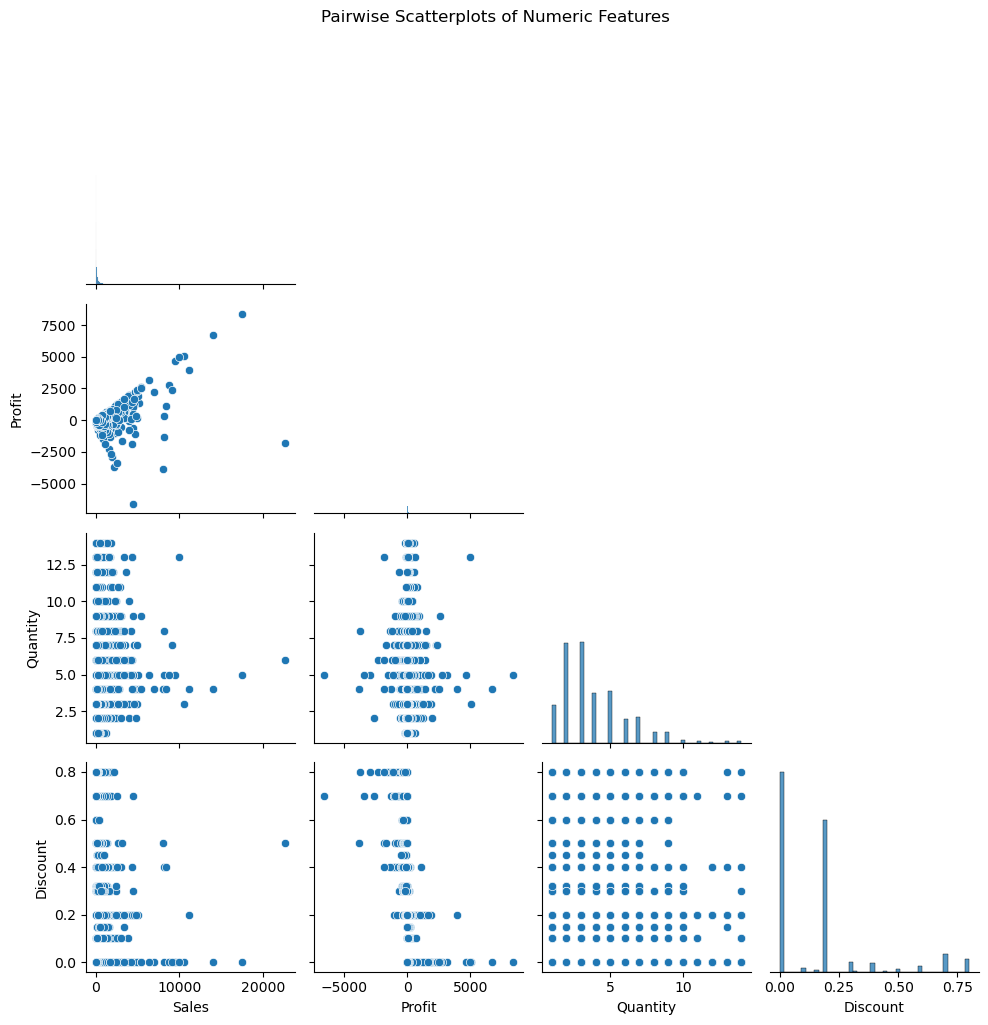

In [13]:
sns.pairplot(df[numeric_cols], kind='scatter', corner=True)
plt.suptitle("Pairwise Scatterplots of Numeric Features", y=1.02)
plt.tight_layout()
plt.savefig("pairplot.png")
plt.show()

### Pairwise Relationships
- Visual inspection confirms heatmap correlations. 
- Sales and Profit: clear positive trend.
- Quantity vs Sales: increasing trend but some scatter.
- Discount shows slight downward trend with Profit.
- No unusual clusters, but outliers are visible in Sales and Profit.

### Summary of Strongest Relationships

In [16]:
# Flatten correlation matrix and sort
corr_pairs = corr.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
strongest = corr_pairs.sort_values(ascending=False)
strongest = strongest.drop_duplicates()  # avoid duplicates
print("Top positive correlations:")
print(strongest.head(3))
print("\nTop negative correlations:")
print(strongest.tail(3))

Top positive correlations:
Sales   Profit      0.479127
        Quantity    0.200697
Profit  Quantity    0.066214
dtype: float64

Top negative correlations:
Quantity  Discount    0.008979
Sales     Discount   -0.028457
Profit    Discount   -0.219443
dtype: float64


### Strongest Correlations
Strongest Positive Relationships

Sales & Profit (0.48):

This is a moderate positive correlation, indicating that higher sales generally lead to higher profit.

This is expected in retail data and confirms that sales performance is a key driver of profitability.

Sales & Quantity (0.20):

This is a weak positive correlation, suggesting that selling more units contributes to higher sales, but unit price also plays a significant role.

Profit & Quantity (0.07):

This is a very weak positive correlation, indicating that increasing quantity alone does not strongly increase profit, possibly due to discounts or low-margin products.

Negative Relationships:

Profit & Discount (-0.22)

This is a weak-to-moderate negative correlation, showing that higher discounts tend to reduce profit.

This highlights the trade-off between promotional strategies and profitability.


Sales & Discount (-0.03):

This is an extremely weak negative correlation, suggesting that discounts do not strongly influence total sales volume in this dataset.

Quantity & Discount (0.01):

This near-zero correlation indicates almost no linear relationship between discounts and quantity sold.

Key Takeaways:

Sales is the strongest driver of profit, more than quantity.

Discounts have a noticeable negative impact on profit, even if they do not significantly boost sales.

Quantity alone does not guarantee profitability, emphasizing the importance of pricing and margins.

No extremely strong correlations exist (>0.7), suggesting that multiple factors jointly influence performance, rather than a single dominant variable.